In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, plot_coverage, print_forecasts_by_week, forecast_by_week, train_test_split, update_deepAR_parameters
from PythonFiles.Configuration import Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.rolling_dataset import generate_rolling_dataset,StepStrategy
config = Configuration()
influenza_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/influenza.csv", sep=',')
population_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/PopulationVector.csv", sep=',')
neighbourhood_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/AdjacentMatrix.csv", sep=',', index_col=0)

In [2]:
config.train_start_time = datetime(1999,1,1,0,0,0)#datetime(2010,1,1,0,0,0)
config.train_end_time = datetime(2016,9,30,23,0,0)
config.test_end_time = datetime(2018,9,30,23,0,0)
overall_evaluation_df = pd.DataFrame()

data_splits_dict = {}
output_dict = {}

locations = list(influenza_df.location.unique())
#Process the df into a uniformly spaced df
df = influenza_df.loc[influenza_df.location.isin(locations), ['value', 'location', 'date','week']]
df = preprocessing(config, df, check_count=False, output_type="corrected_df")
for location in locations:
    df.loc[df.location == location, "population"] = int(population_df.loc[population_df.Location == location, "2011"].values[0])
    df.loc[df.location == location, locations] = neighbourhood_df.loc[neighbourhood_df.index==location,locations].values[0]

# Creating the different splits

In [3]:
# Data split with no additional features and training start in 2010
#data_splits_dict["without_features_2001"] = list(train_test_split(config, df, False))
data_splits_dict["2001"] = list(train_test_split(config, df, True))

# Change the beginning of the training period
config.train_start_time = datetime(2010,1,1,0,0,0)
#data_splits_dict["without_features_2010"] = list(train_test_split(config, df, False))
data_splits_dict["2010"] = list(train_test_split(config, df, True))

# Model fitting

In [4]:
deepAR_without_features = config.deeparestimator
new_parameters = {"use_feat_dynamic_real" : True,
                  "use_feat_static_real" : True,
                  "use_feat_static_cat" : True,
                  "cardinality" : [2]*411}
deepAR_with_features = update_deepAR_parameters(config, new_parameters)


model_dict = {"DeepAR_without_features":deepAR_without_features, "FFNN":config.feedforwardestimator, "DeepAR_with_features":deepAR_with_features}
for data_split in data_splits_dict.keys():
    print(data_split)
    forecasts_dict, evaluator_df_dict = forecast_by_week(config, data_splits_dict[data_split][0], data_splits_dict[data_split][1], locations, model_dict)
    output_dict[data_split] = [forecasts_dict, evaluator_df_dict]
    #plot_coverage(config, evaluator_df_dict)

2001


100%|██████████| 50/50 [00:30<00:00,  1.61it/s, epoch=8/8, avg_epoch_loss=0.624]


Ende make_evaluation_prediction: 2023-03-24 13:58:48.176837
Ende umformen in Listen: 2023-03-24 14:00:32.044017


Running evaluation: 411it [00:02, 166.98it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 167.46it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 167.86it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 168.82it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
100%|██████████| 50/50 [00:28<00:00,  1.76it

Ende make_evaluation_prediction: 2023-03-24 14:04:41.466097
Ende umformen in Listen: 2023-03-24 14:04:56.879970


Running evaluation: 411it [00:02, 161.38it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 161.93it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 161.71it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 161.20it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
100%|██████████| 50/50 [00:51<00:00,  1.03s/

Ende make_evaluation_prediction: 2023-03-24 14:10:15.156682
Ende umformen in Listen: 2023-03-24 14:14:32.399683


Running evaluation: 411it [00:02, 155.00it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 151.89it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 153.57it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 153.60it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


2010


100%|██████████| 50/50 [00:32<00:00,  1.54it/s, epoch=8/8, avg_epoch_loss=0.77] 


Ende make_evaluation_prediction: 2023-03-24 14:20:03.638766
Ende umformen in Listen: 2023-03-24 14:21:41.453287


Running evaluation: 411it [00:03, 103.24it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:04, 94.36it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:04, 88.84it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:04, 100.03it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
100%|██████████| 50/50 [00:30<00:00,  1.64it/s

Ende make_evaluation_prediction: 2023-03-24 14:27:12.286793
Ende umformen in Listen: 2023-03-24 14:27:26.841946


Running evaluation: 411it [00:02, 145.12it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 142.78it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 146.24it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 144.31it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
100%|██████████| 50/50 [00:36<00:00,  1.38it

Ende make_evaluation_prediction: 2023-03-24 14:33:13.881203
Ende umformen in Listen: 2023-03-24 14:36:52.031710


Running evaluation: 411it [00:03, 134.71it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 138.14it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 138.68it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 137.20it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


# Comparative Evaluation

In [5]:
final_evaluation_df = pd.DataFrame()
for data_split in output_dict.keys():
    forecasts_dict = output_dict[data_split][0]
    evaluator_df_dict = output_dict[data_split][1]
    #print(data_split)
    #plot_coverage(config, evaluator_df_dict)
    for key in evaluator_df_dict.keys():
        evaluation_df = evaluator_df_dict[key].copy()
        evaluation_df = evaluation_df.loc[evaluation_df.item_id.isin([item_id for item_id in evaluation_df.item_id if "aggregate" in item_id]),]        
        evaluation_df['ID'] = str(data_split) + str(key)
        final_evaluation_df = pd.concat([final_evaluation_df, evaluation_df])
for i in range(1,5):
    print(f"Week-{i}-Ahead")
    print(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}" ,["ID", "mean_WIS", "MAE_Coverage"]].reset_index(drop=True))

Week-1-Ahead
                            ID    mean_WIS  MAE_Coverage
0  2001DeepAR_without_features  370.768752      0.245199
1                     2001FFNN  400.547810      0.124481
2     2001DeepAR_with_features  661.491050      0.208504
3  2010DeepAR_without_features  310.734063      0.258748
4                     2010FFNN  414.365363      0.123765
5     2010DeepAR_with_features  652.293083      0.233960
Week-2-Ahead
                            ID    mean_WIS  MAE_Coverage
0  2001DeepAR_without_features  504.810810      0.258074
1                     2001FFNN  521.382377      0.131050
2     2001DeepAR_with_features  741.943813      0.202989
3  2010DeepAR_without_features  411.791223      0.265838
4                     2010FFNN  573.760671      0.133139
5     2010DeepAR_with_features  725.179788      0.220698
Week-3-Ahead
                            ID    mean_WIS  MAE_Coverage
0  2001DeepAR_without_features  639.856830      0.269679
1                     2001FFNN  702.436149      0

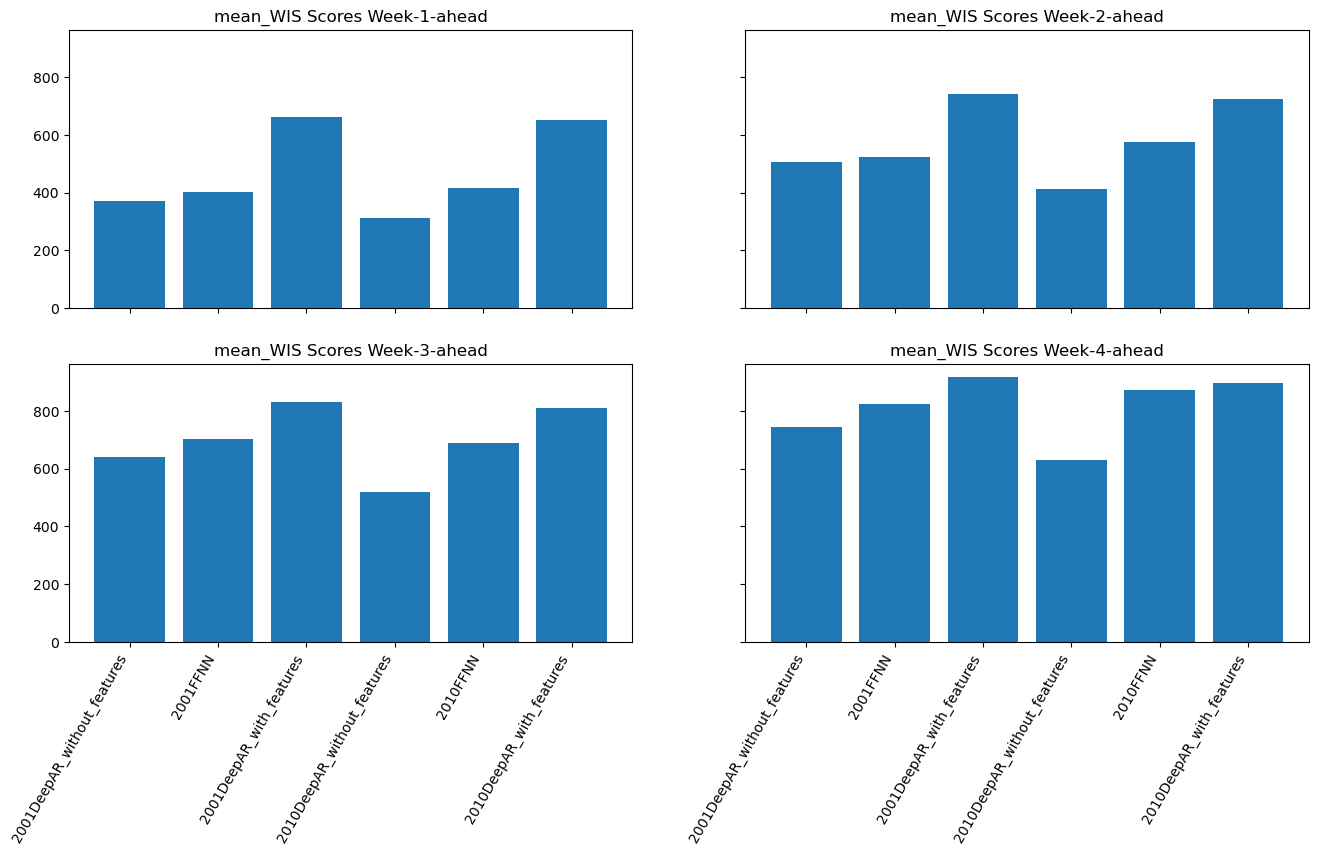

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharey=True)
for i in range(1,5):
    if i == 1:
        plotnumber = (0, 0)
    if i == 2:
        plotnumber = (0, 1)
    if i == 3:
        plotnumber = (1, 0)
    if i == 4:
        plotnumber = (1, 1)
    axs[plotnumber].bar(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","ID"], final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","mean_WIS"])
    axs[plotnumber].set_title(f"mean_WIS Scores Week-{i}-ahead")
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()